In [6]:
# gradient boosting classifier

from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [7]:
df = pd.read_csv("sports_management_encoded.csv")
df

,Energy Consumption,Carbon Emissions,Waste Generation,Community Engagement,Volunteer Participation,Health Impact,Water Usage,Material Recycling Rate,Operational Cost Efficiency,Sustainability Score,...,National Event,Regional Event,Community Development Event,Health-Oriented Event,Recreational Event,Youth-Focused Event,Community Development Event.1,Health-Oriented Event.1,Recreational Event.1,Youth-Focused Event.1
0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,2.0,2.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101995,2.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101996,1.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101997,1.0,2.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
101998,0.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [8]:
#Define X and y columns
X= df.drop(columns = ["Sustainability Score"]) 
y= df["Sustainability Score"] 

In [9]:
#Check for data balance
y.value_counts()

Sustainability Score
2.0    50697
1.0    30891
0.0    20412
Name: count, dtype: int64

In [10]:
#Create a GradientBoostingClassifier
gb =GradientBoostingClassifier()

In [11]:
# Calculate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    gb, X, y, cv=5, scoring='balanced_accuracy', n_jobs=-1
)

In [13]:

# Calculate mean and standard deviation of training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation of testing scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

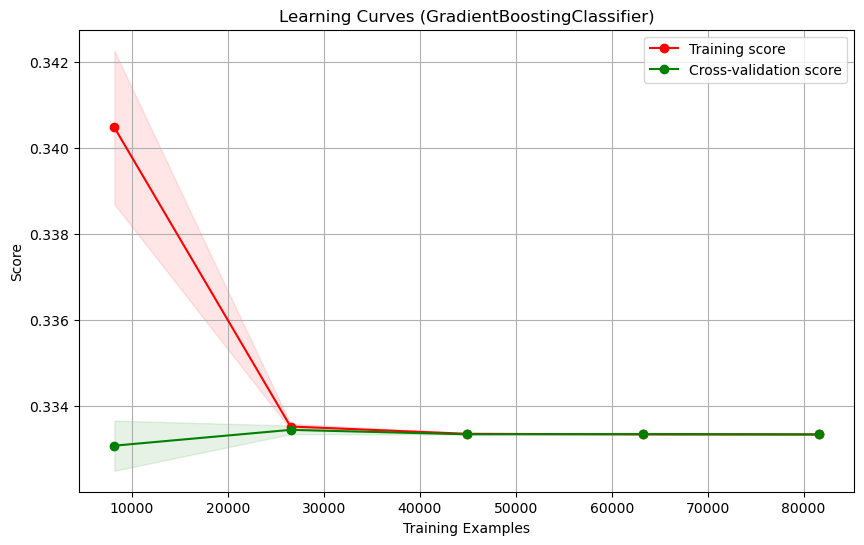

In [14]:
# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.title("Learning Curves (GradientBoostingClassifier)")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
)
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
)
plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [ ]:
#This is a way to see the actual overfitting of the data in the model